In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import required modules
import numpy as np
from numpy.fft import rfft, irfft
import pylab as pl

#Define the  square wave function
def f(t):
    if np.floor(2*t)%2==0: #This says "Is there a remainder; does it equal zero?" 
        return 1
    else:
        return -1

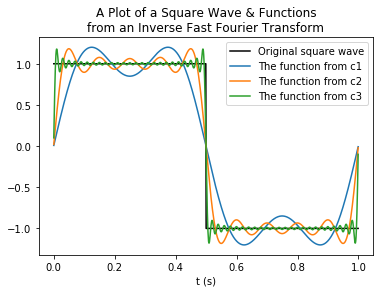

In [3]:
#3a
#
'''create an array of N = 1000 elements containing a thousand equally 
spaced samples from a single cycle of this squarewave'''
#

N=1000
t=np.arange(0.0,1.0,1.0/N)
y=map(f,t)
Cycle = np.fromiter(y, dtype=np.float) 
#
'''fromiter acts to create a 1D array form an iterable object. 
Because the map fuction using a "_next_" call it is an iterator;
it does one thing then the next this means the "y" in this case
is itterable as it is calling the iterator'''
#

#3b
c=rfft(Cycle) # returns the Fourier coefficients as complex numbers.

#3c
c1,c2,c3= np.copy(c),np.copy(c),np.copy(c) #creates 3 copys of the coefficient array.

#now can set all but the first 5 elements as 0 in c1
c1[5:]=0
#now can set all but the first 10 elements as 0 in c1
c2[10:]=0
#now can set all but the first 50 elements as 0 in c1
c3[50:]=0

#3d
#Now am going to use irfft to recover the smoothed signel
#Thought I am calling them "LineN" using irfft produces an array of points.
line1=irfft(c1)
line2=irfft(c2)
line3=irfft(c3)

#3e
pl.plot(t,Cycle,label='Original square wave',color="black")
pl.plot(t,line1,label='The function from c1')
pl.plot(t,line2,label='The function from c2')
pl.plot(t,line3,label='The function from c3')
pl.xlabel('t (s)')
pl.legend()
pl.title('''A Plot of a Square Wave & Functions
from an Inverse Fast Fourier Transform''')
pl.show()

To try and explain why there are artifacts present in the functions produced from $c_1, c_2$ and $c_3$ I will look at one particular line and explain why it has the "wiggles" it has and then apply that logic to the others.

Looking at the smoothed function (blue line) produced from $c_1$, this has the least coefficients with only five of the original haveing been kept.

The coefficients produced from the original step (square wave) function detail the contribution of each Cosine and Sine function that are present in the Fourier series of this original function.

So, with only five coefficients remaining and the rest changed to zero this means that only a few Sine and Cosine functions are summed when using **numpy.fft.irfft** to reconstruct the fuction. Hence the the function produced from $c_1$ has the most "wiggle" and looks the least like the original square wave.

It would follow that the lines form $c_2$ with ten coefficients (orange) and $c_3$ with fifty coefficients (green) would have less artifacts; less "wiggle". Looking at the plot, this can be seen to be true.